### Project Outline
* ## [POSTGRES DATABASE / ADD STUDENT FUNCTION](#Postgres)
-  Run docker-compose file to create Docker database container
-  Create database named "student_grades" in PgAdmin
-  Connect PgAdmin server/database to Docker container
-  Send data to postgres database using SQL alchemy
-  Use psycopg2 connection to create python function that adds new students to database

* ## [EDA](#EDA)

-  Initialize repository, set up notebook, import data
-  Create GitHub repository, link to local, 1st commit + push
-  EDA
-  Data cleaning, pre-processing, etc.

* ## [Data Preparation](#Dataprep)

-  Separate Target from features
-  Train-Test Split
-  Categorical + Numerical separation, one-hot encoding, scaling etc. 


* ## [MODELING](#Modeling)
### Strategy:  simple train-test split to evaluate overall model performance.  Redo with train-val-test with hyperparameter tuning
-  Choose and build series of models
-  Train, fit, test all models
-  Choose scoring, gridsearch and optimized model run final results
-  Repeat process with new model that does predictions without previous grade data

### ANALYSIS
-  Summarize Model Results
-  Identify Executive Insights
-  Suggest areas for improvements
-  Simplify notebook with functions, pipelines, etc.
-  Final Code Documentation

#### REPORT
-  Outline Written Report
-  Write/Proofread Written Report


In [2]:
# Standard packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

# Data Preparation
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    LabelEncoder,
    TargetEncoder,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFECV

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

# Model Evaluation
from sklearn import datasets, metrics, svm
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

<a id='Postgres'></a>
## Postgres

In [3]:
data = pd.read_csv("data.csv", sep=";")
df = data.copy(deep=True)

##### Use SQLAlchemy to send data to postgres database
#### Steps:
* Export initial data to postgres database
* Create "New Student" dictionary to add row to database, convert dictionary to DataFrame
* Export new student data to existing database table with if_exists = "append" to add  to end of frame

In [4]:
# from Functions import *     # File containing functions to streamline code

# # Call data_to_postgres function with df (dataframe to export)
# # and 'student_grades' (name of postgres database table)

# data_to_postgres(df,'student_grades')

In [5]:
# # Import dictionary with new student information
# from New_Student_Info import *  
# # Call add_new function, passing new_student dictionary and 'student_grades' table name
# add_new(new_student, "student_grades")

<a id='EDA'></a>

## EDA

In [6]:
print(df.info())
print("MISSING VALUES: ", df.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      316 non-null    object
 1   sex         316 non-null    object
 2   age         316 non-null    int64 
 3   address     316 non-null    object
 4   famsize     316 non-null    object
 5   Pstatus     316 non-null    object
 6   Medu        316 non-null    int64 
 7   Fedu        316 non-null    int64 
 8   Mjob        316 non-null    object
 9   Fjob        316 non-null    object
 10  reason      316 non-null    object
 11  guardian    316 non-null    object
 12  traveltime  316 non-null    int64 
 13  studytime   316 non-null    int64 
 14  failures    316 non-null    int64 
 15  schoolsup   316 non-null    object
 16  famsup      316 non-null    object
 17  paid        316 non-null    object
 18  activities  316 non-null    object
 19  nursery     316 non-null    object
 20  higher    

In [7]:
print(df.describe().T)
print(75*"-")
display(df.head())

            count       mean       std   min   25%   50%   75%   max
age         316.0  16.693038  1.310791  15.0  16.0  17.0  18.0  22.0
Medu        316.0   2.768987  1.104301   0.0   2.0   3.0   4.0   4.0
Fedu        316.0   2.525316  1.070228   0.0   2.0   3.0   3.0   4.0
traveltime  316.0   1.436709  0.703132   1.0   1.0   1.0   2.0   4.0
studytime   316.0   2.088608  0.849872   1.0   2.0   2.0   2.0   4.0
failures    316.0   0.306962  0.724239   0.0   0.0   0.0   0.0   3.0
famrel      316.0   3.924051  0.908823   1.0   4.0   4.0   5.0   5.0
freetime    316.0   3.240506  0.968916   1.0   3.0   3.0   4.0   5.0
goout       316.0   3.151899  1.099363   1.0   2.0   3.0   4.0   5.0
Dalc        316.0   1.474684  0.899378   1.0   1.0   1.0   2.0   5.0
Walc        316.0   2.297468  1.311776   1.0   1.0   2.0   3.0   5.0
health      316.0   3.503165  1.404072   1.0   3.0   4.0   5.0   5.0
absences    316.0   5.693038  7.580096   0.0   0.0   4.0   8.0  56.0
G1          316.0  10.924051  3.19

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,16,U,LE3,T,4,3,teacher,services,...,5,4,3,1,2,1,2,16,15,15
1,GP,M,18,U,LE3,T,1,1,other,other,...,2,3,5,2,5,4,0,6,5,0
2,GP,M,17,R,LE3,A,4,4,teacher,other,...,3,3,3,2,3,4,2,10,11,12
3,GP,F,15,U,LE3,T,3,2,services,other,...,4,4,4,1,1,5,10,7,6,6
4,GP,M,16,U,GT3,T,2,3,other,other,...,5,3,3,1,1,3,0,13,14,14


In [8]:
# Separate categorical and numerical variables for investigation
numerical = [col for col in df.columns if df[col].dtype == "int64"]
categorical = [col for col in df.columns if df[col].dtype != "int64"]
print("Numerical features: ", len(numerical))
print("Categorical features: ", len(categorical))
display("Numerical features: ", df[numerical].head(2))
display("Categorical features: ", df[categorical].head(2))

Numerical features:  16
Categorical features:  17


'Numerical features: '

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,16,4,3,3,2,0,5,4,3,1,2,1,2,16,15,15
1,18,1,1,1,1,3,2,3,5,2,5,4,0,6,5,0


'Categorical features: '

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,LE3,T,teacher,services,course,mother,no,yes,no,yes,yes,yes,yes,no
1,GP,M,U,LE3,T,other,other,course,mother,no,no,no,no,yes,no,yes,yes


In [9]:
df[categorical].nunique()

school        2
sex           2
address       2
famsize       2
Pstatus       2
Mjob          5
Fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

In [10]:
#Split categorical features into binary and nominal for encoding flexibility
binary = [col for col in df.columns if df[col].nunique() ==2]
nominal = [col for col in df.columns if (df[col].dtype == 'object' and df[col].nunique() >2)]
#check length of 3 feature types matches total
print(len(numerical)+len(binary)+len(nominal))

33


In [11]:
# Investigate nominal categories Mjob + Fjob
display(df["Mjob"].value_counts())
display(df["Fjob"].value_counts())

Mjob
other       115
services     77
teacher      50
at_home      46
health       28
Name: count, dtype: int64

Fjob
other       175
services     86
teacher      24
at_home      16
health       15
Name: count, dtype: int64

In [12]:
# Investigate nominal categories reason + guardian
display(df["reason"].value_counts())
display(df["guardian"].value_counts())

reason
course        112
home           88
reputation     85
other          31
Name: count, dtype: int64

guardian
mother    221
father     67
other      28
Name: count, dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'Medu'}>,
        <Axes: title={'center': 'Fedu'}>,
        <Axes: title={'center': 'traveltime'}>],
       [<Axes: title={'center': 'studytime'}>,
        <Axes: title={'center': 'failures'}>,
        <Axes: title={'center': 'famrel'}>,
        <Axes: title={'center': 'freetime'}>],
       [<Axes: title={'center': 'goout'}>,
        <Axes: title={'center': 'Dalc'}>,
        <Axes: title={'center': 'Walc'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'absences'}>,
        <Axes: title={'center': 'G1'}>, <Axes: title={'center': 'G2'}>,
        <Axes: title={'center': 'G3'}>]], dtype=object)

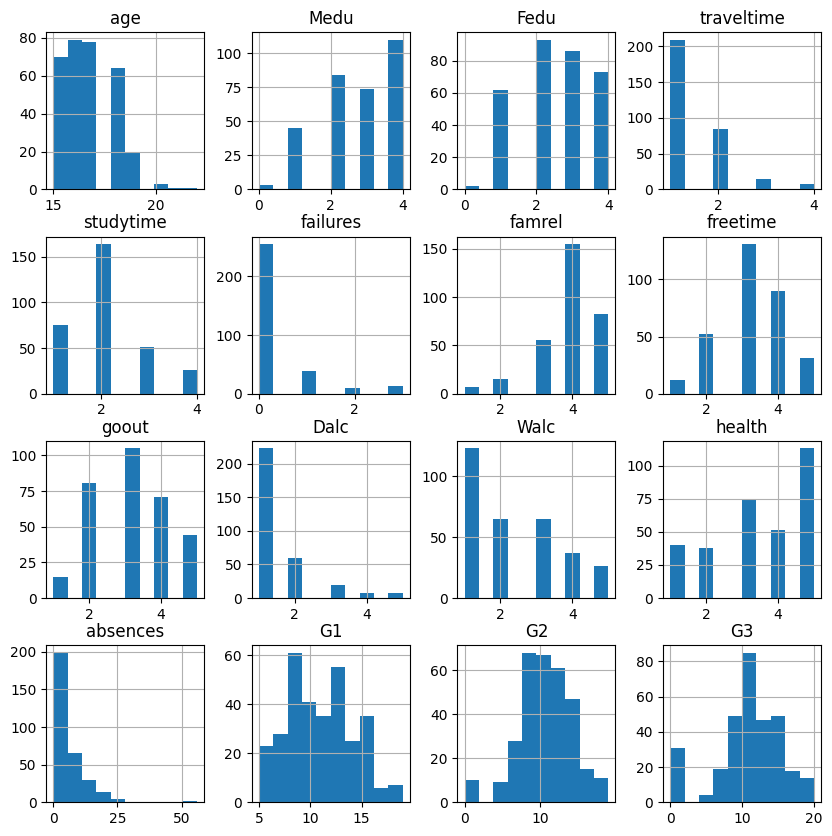

In [13]:
# Look at distribution of numerical data
df.hist(figsize=(10,10))

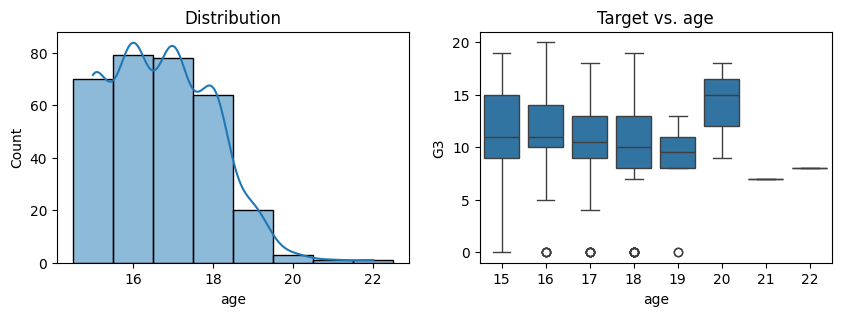

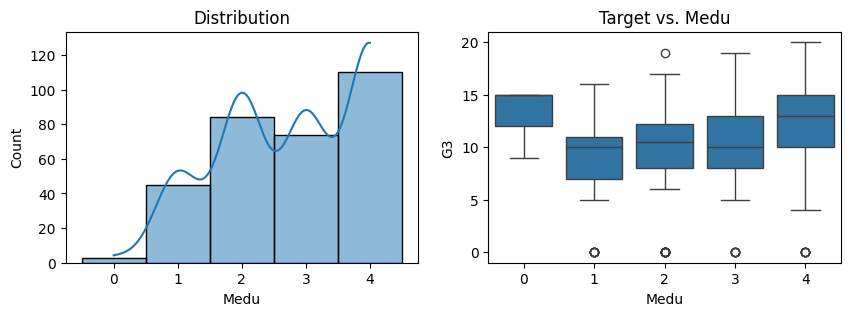

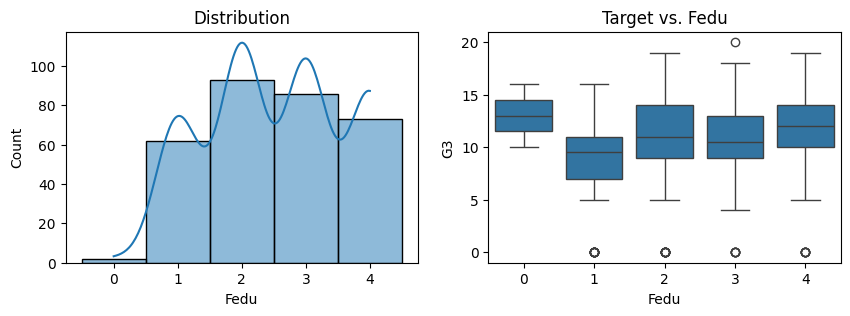

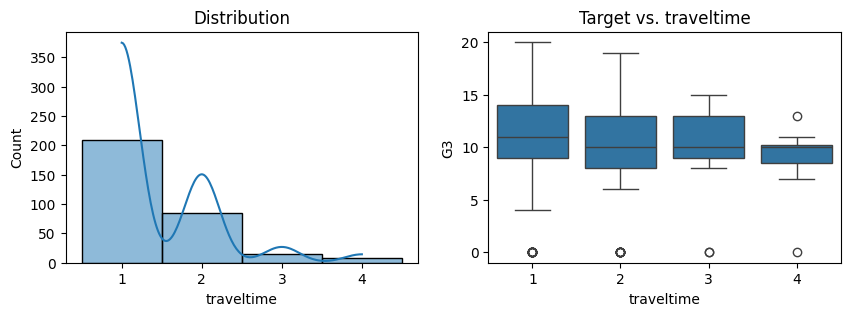

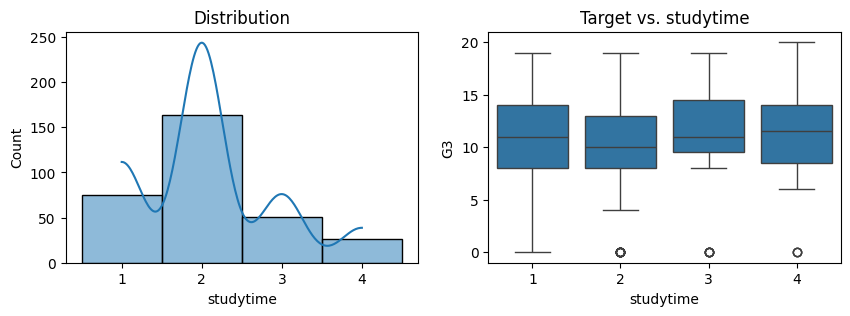

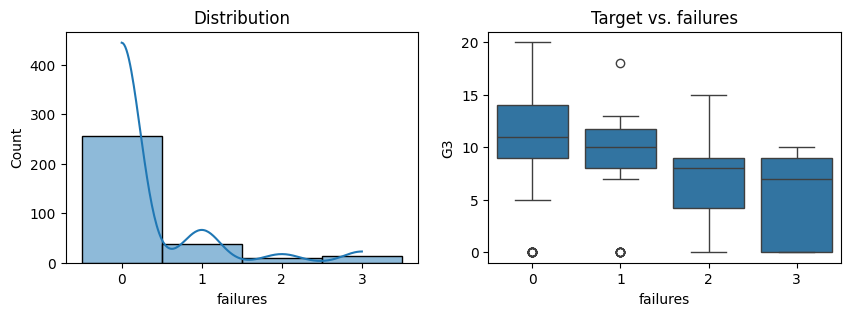

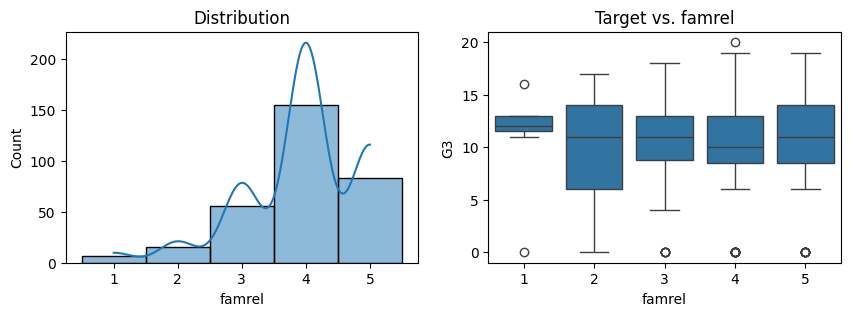

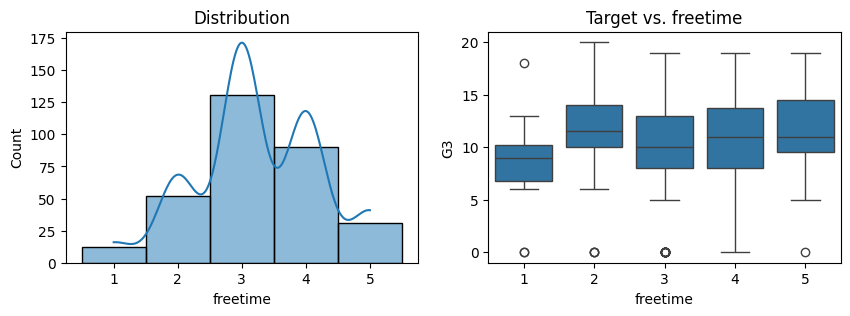

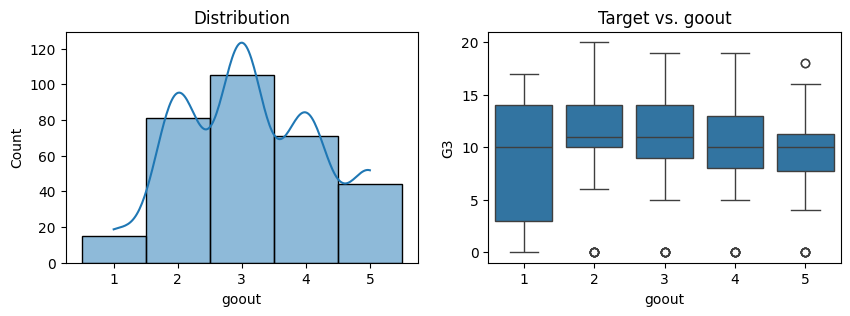

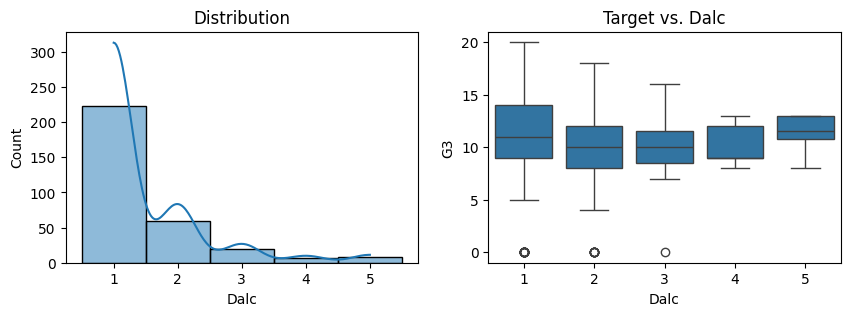

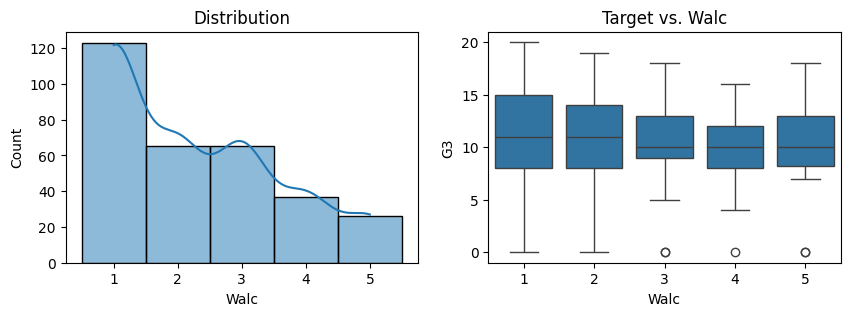

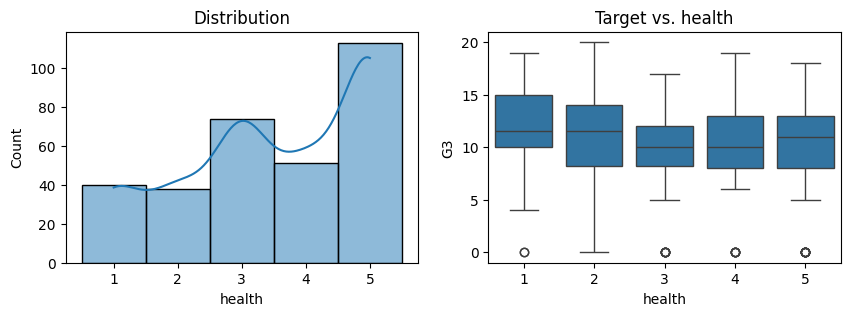

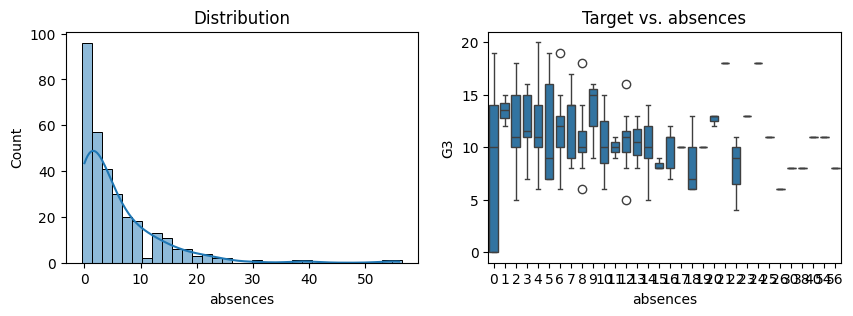

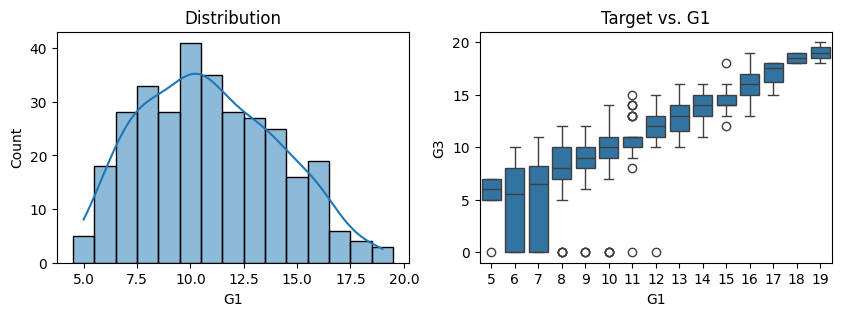

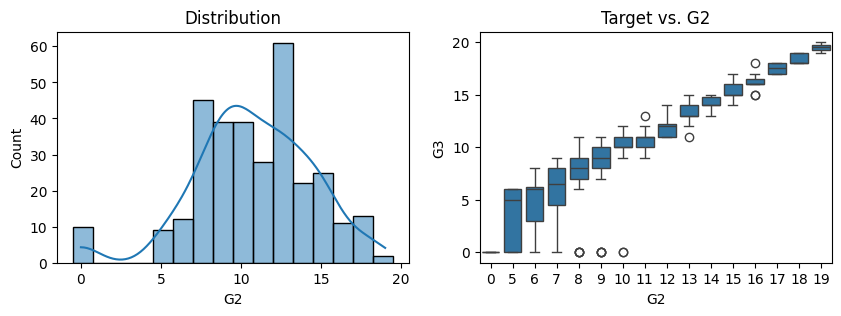

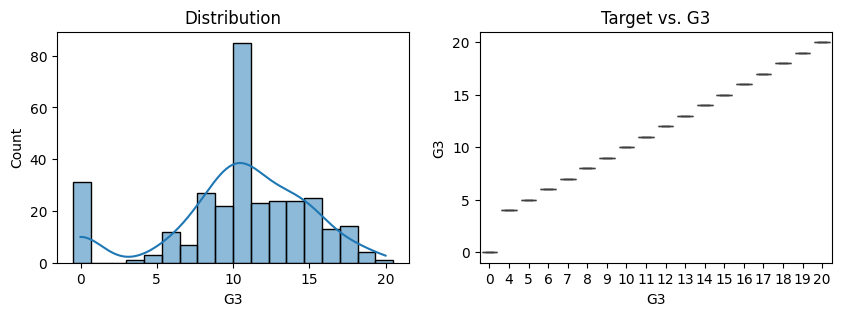

In [14]:
# Now again in more detail
for i in df[numerical].columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
    bin_edges = np.linspace(df[i].min() - 0.5, df[i].max() + 0.5, df[i].nunique() + 1)
    ax1.title.set_text("Distribution")
    ax2.title.set_text(f"Target vs. {i}")
    sns.histplot(data=df, x=i, bins=bin_edges, kde=True, ax=ax1)
    sns.boxplot(data=df, x=i, y=df["G3"], ax=ax2)
    fig.tight_layout
    plt.show()

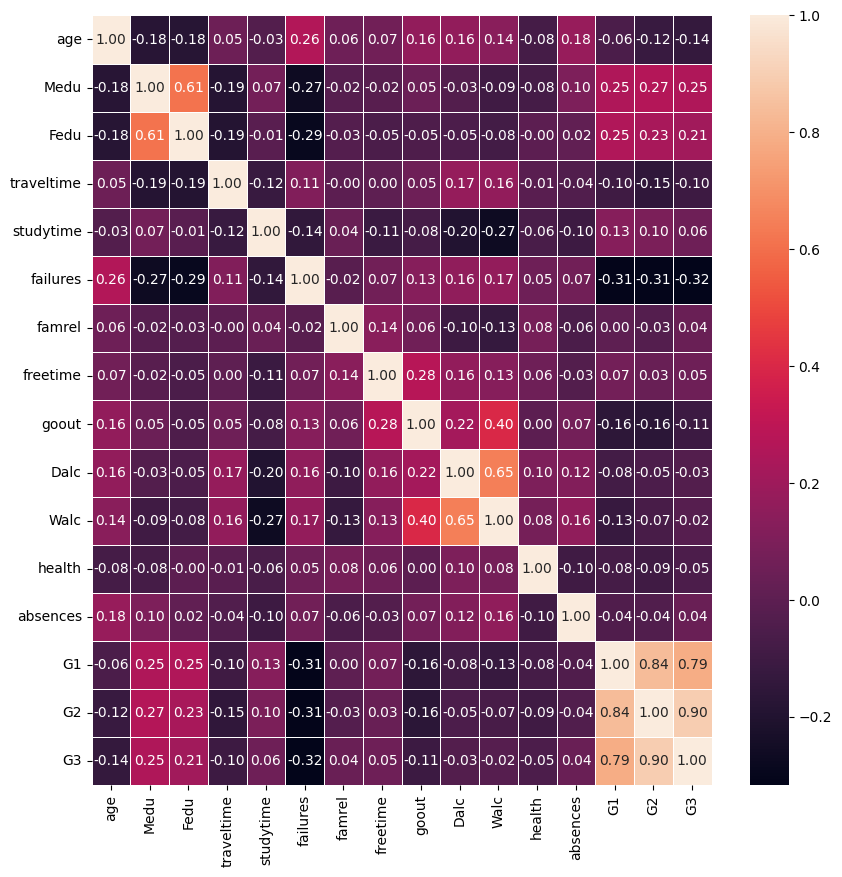

In [15]:
#check for correlation amongst numerical features
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
sns.heatmap(df[numerical].corr(), annot=True, fmt=".2f",linewidths=0.5)
plt.show()

In [16]:
# Create 2 New Numerical Datasets: Weak correlation only and Strong correlation only
df_weakcorr = df.copy(deep=True)
df_weakcorr = df_weakcorr.drop(columns=["G1", "G2","failures","Dalc","Walc","goout","Fedu","Medu"])
df_strongcorr = df.copy(deep=True)
df_strongcorr = df_strongcorr[["G1", "G2","G3","failures","Dalc","Walc","goout","Fedu","Medu"]]

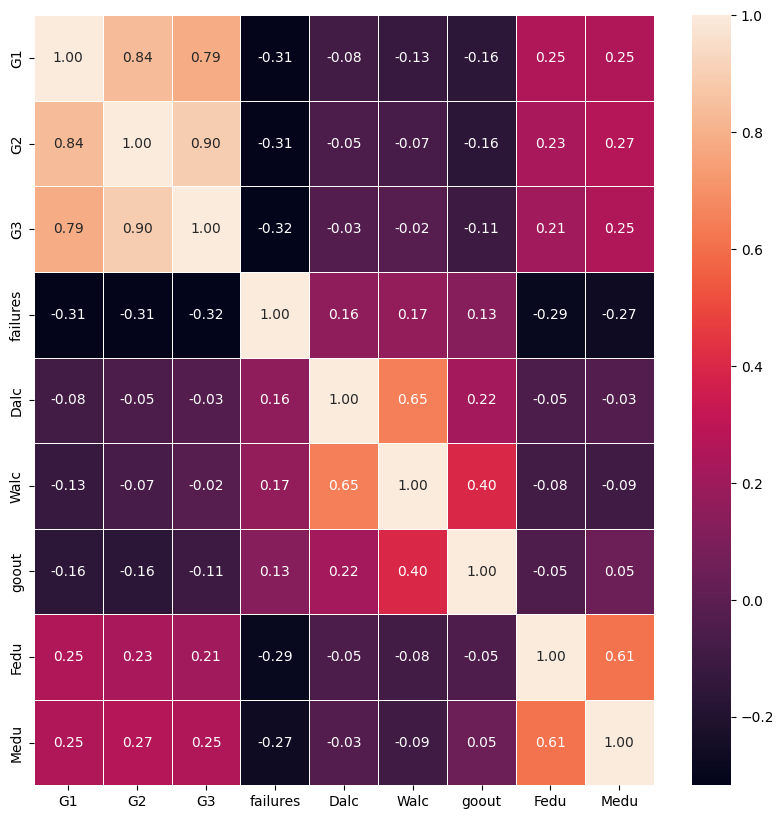

In [17]:
# Check correlation for Strong set
strongcorr_num = [col for col in df_strongcorr.columns if df_strongcorr[col].dtype != 'object']

plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
sns.heatmap(df_strongcorr[strongcorr_num].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

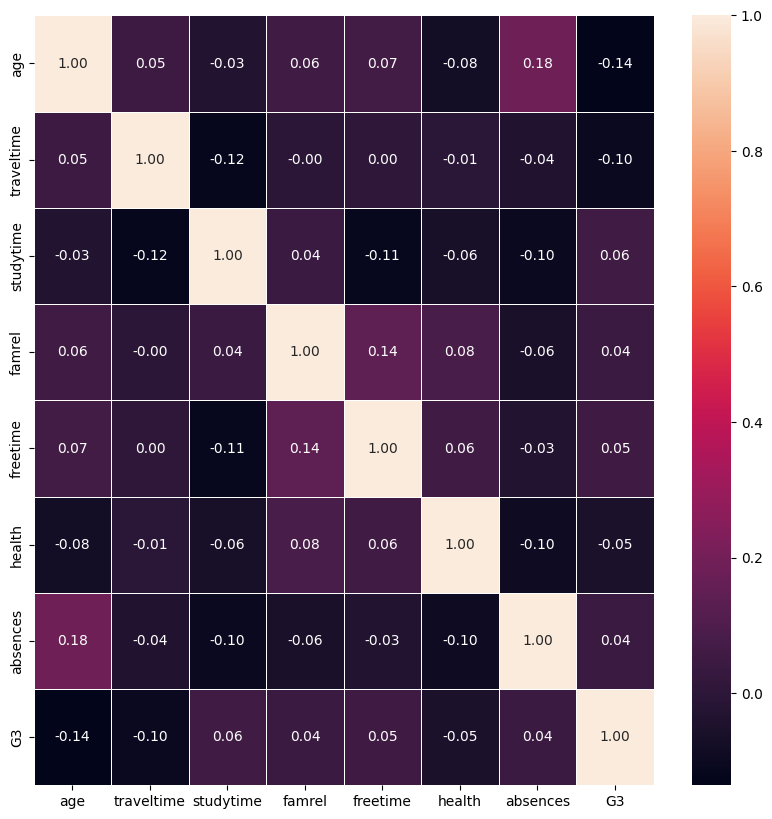

In [18]:
# Check correlation for weak set
weakcorr_num = [col for col in df_weakcorr.columns if df_weakcorr[col].dtype != 'object']

plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
sns.heatmap(df_weakcorr[weakcorr_num].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [19]:
# Create copy of df for use in bonus model
df_bonus = df.copy(deep=True)
df_bonus = df.drop(columns=["G1", "G2"])

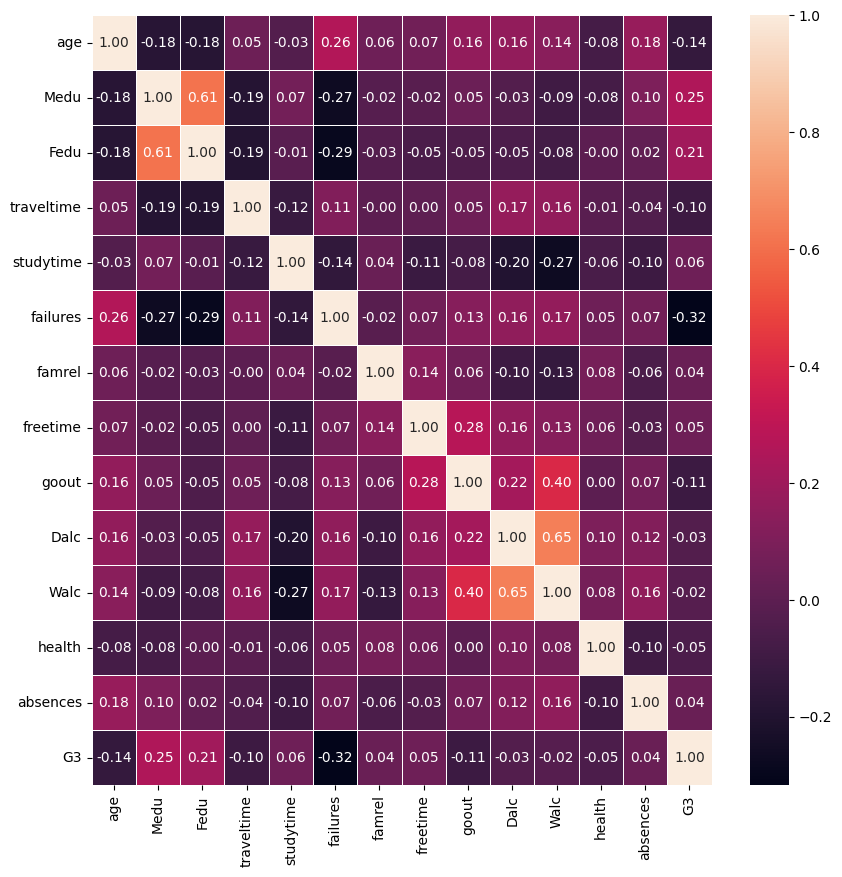

In [20]:
# Check correlation of bonus df
bonus_numerical = [col for col in numerical if col not in ("G1", "G2")]

plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
sns.heatmap(df_bonus[bonus_numerical].corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

In [21]:
# # FUNCTION NOT WORKING
# from Feature_Selection import *

# mi_select(10)


In [22]:
# # FUNCTION NOT WORKING
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(6, 4))
# plot_mi_scores(top10[1])

In [23]:
from sklearn.feature_selection import mutual_info_regression

X = df.copy()
y = X.pop("G3")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:10]

G2           1.373491
G1           0.804521
absences     0.148096
failures     0.105018
schoolsup    0.049370
goout        0.046140
Medu         0.043282
Dalc         0.040752
Mjob         0.040534
nursery      0.035245
Name: MI Scores, dtype: float64

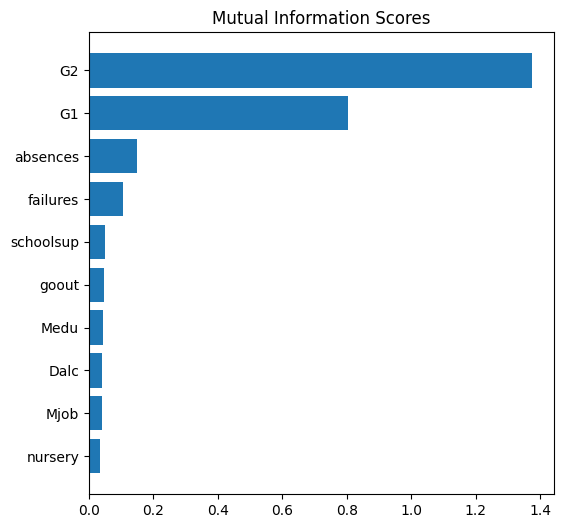

In [24]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(6, 6))
plot_mi_scores(mi_scores[:10])

In [25]:
mi_featureslist =list(mi_scores[mi_scores > 0.009].keys())
df_mi_10 = df[mi_featureslist]
df_mi_10.head()

,G2,G1,absences,failures,schoolsup,goout,Medu,Dalc,Mjob,nursery,Walc,internet,sex,Fjob,higher,reason,romantic
0,15,16,2,0,no,3,4,1,teacher,yes,2,yes,F,services,yes,course,no
1,5,6,0,3,no,5,1,2,other,yes,5,yes,M,other,no,course,yes
2,11,10,2,0,no,3,4,2,teacher,yes,3,yes,M,other,yes,course,no
3,6,7,10,0,no,4,3,1,services,yes,1,yes,F,other,yes,reputation,no
4,14,13,0,0,no,3,2,1,other,yes,1,yes,M,other,yes,home,no


<a id='Dataprep'></a>

## Data Preparation

In [26]:
# #List of Dataframes with different selected features
# df_mi_10 = pd.read_csv('df_mi_10.csv')

In [27]:
### import pickle not allowed
# #Pickling
# # DUMP

# # OPEN
# # Loading model to compare the results
# model = pickle.load(open('model.pkl','rb'))

In [28]:
# Define scaling functions, adjust these parameters later
standard = StandardScaler()  # subtract mean, divide by std
minmax = MinMaxScaler()  # subtract min, divide by max - min
OHE = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # create category for each value, 1 and 0's
LE = LabelEncoder()  # assign numeric value for each unique value
TE = TargetEncoder()  # assign weighted mean of target value


# DATA PREPARATION
# Separate Target
def data_prep(data, encoder, scaler):
    X = data.drop("G3", axis=1)
    y = data["G3"]

    # Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Define columns and transformers
    numerical_features = [col for col in X.columns if X[col].dtype == "int64"]
    categorical_features = [col for col in X.columns if X[col].dtype == "object"]

    # CATEGORICAL FEATURE TRANSFORMER
    cat_encoder = ColumnTransformer([("cat", encoder, categorical_features)], remainder="passthrough")
    # fit_transform on train...
    Xtr_cat_encoded = pd.DataFrame(cat_encoder.fit_transform(X_train),columns = [feat.split('__')[1] for feat in cat_encoder.get_feature_names_out()])
    # then then transform test.
    Xte_cat_encoded = pd.DataFrame(cat_encoder.transform(X_test),columns = [feat.split('__')[1] for feat in cat_encoder.get_feature_names_out()])
    train_cols = Xtr_cat_encoded.columns
    trest_cols = Xte_cat_encoded.columns
    
    # SCALER TRANSFORMER
    scale_all = ColumnTransformer([("scale",scaler,train_cols)])
    #fit_transform on train...
    X_train_processed = pd.DataFrame(scale_all.fit_transform(Xtr_cat_encoded),columns = [s.split('__')[1] for s in cat_encoder.get_feature_names_out()])
    #then transform test
    X_test_processed = pd.DataFrame(scale_all.transform(Xte_cat_encoded),columns = [s.split('__')[1] for s in cat_encoder.get_feature_names_out()])
    return X_train_processed,X_test_processed, y_train, y_test
    
    
    
X_train, X_test, y_train, y_test = data_prep(df, OHE, standard)

In [29]:
k_list = list(np.arange(1,11))
scorer = {'mse':'neg_mean_squared_error','mae':'neg_mean_absolute_error'}
# PCA Selector
pca = PCA()

# Maybe some original features were good, too?
selection = SelectKBest()

# Build estimator from PCA and Univariate selection:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

# Use combined features to transform dataset:
X_features = combined_features.fit_transform(X, y)
print("Combined space has", X_features.shape[1], "features")

# Regressor models
svr = SVR(kernel="linear")
rf_regressor = RandomForestRegressor()
gb_regressor = GradientBoostingRegressor()

# Do grid search over parameters for each regressor:
svr_param_grid = dict(
    features__pca__n_components=[1, 2, 3],
    features__univ_select__k=k_list,
    svr__C=[0.0001, 0.001, 0.01, 0.1, 1, 10],
)

rf_param_grid = dict(
    features__pca__n_components=[1, 2, 3],
    features__univ_select__k=k_list,
    rf_regressor__n_estimators=[50, 100, 200],
    rf_regressor__max_depth=[None, 10, 20],
)

gb_param_grid = dict(
    features__pca__n_components=[1, 2, 3],
    features__univ_select__k=k_list,
    gb_regressor__n_estimators=[50, 100, 200],
    gb_regressor__learning_rate=[0.01, 0.1, 0.2],
)

# Grid search for each regressor
svr_grid_search = GridSearchCV(Pipeline([("features", combined_features), ("svr", svr)]), param_grid=svr_param_grid, refit = 'mse', scoring = scorer, verbose=3)
rf_grid_search = GridSearchCV(Pipeline([("features", combined_features), ("rf_regressor", rf_regressor)]), param_grid=rf_param_grid, refit = 'mse', scoring = scorer, verbose=3)
gb_grid_search = GridSearchCV(Pipeline([("features", combined_features), ("gb_regressor", gb_regressor)]), param_grid=gb_param_grid, refit = 'mse', scoring = scorer, verbose=3)

# Fit the grid searches
svr_grid_search.fit(X_train, y_train)
rf_grid_search.fit(X_train, y_train)
gb_grid_search.fit(X_train, y_train)
''

Combined space has 42 features
Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END features__pca__n_components=1, features__univ_select__k=1, svr__C=0.0001; mae: (test=-3.751) mse: (test=-23.392) total time=   0.0s
[CV 2/5] END features__pca__n_components=1, features__univ_select__k=1, svr__C=0.0001; mae: (test=-3.026) mse: (test=-17.823) total time=   0.0s
[CV 3/5] END features__pca__n_components=1, features__univ_select__k=1, svr__C=0.0001; mae: (test=-3.457) mse: (test=-20.427) total time=   0.0s
[CV 4/5] END features__pca__n_components=1, features__univ_select__k=1, svr__C=0.0001; mae: (test=-3.632) mse: (test=-25.246) total time=   0.0s
[CV 5/5] END features__pca__n_components=1, features__univ_select__k=1, svr__C=0.0001; mae: (test=-3.552) mse: (test=-23.458) total time=   0.0s
[CV 1/5] END features__pca__n_components=1, features__univ_select__k=1, svr__C=0.001; mae: (test=-3.582) mse: (test=-21.708) total time=   0.0s
[CV 2/5] END features__pca__n_compone

KeyboardInterrupt: 

In [ ]:
print(svm_grid_search.best_estimator_)
print(svm_grid_search.cv_results_.keys())
print(svm_grid_search.best_score_)
print(svm_grid_search.best_params_)

# print(rf_grid_search.best_estimator_)
# print(gb_grid_search.best_estimator_)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=3)),
                                                ('univ_select',
                                                 SelectKBest(k=4))])),
                ('svm', SVR(C=1, kernel='linear'))])
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_features__pca__n_components', 'param_features__univ_select__k', 'param_svm__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])
0.7700164641515671
{'features__pca__n_components': 3, 'features__univ_select__k': 4, 'svm__C': 1}


In [ ]:
svm_best = svm_grid_search.best_estimator_
preddies = svm_best.predict(X_train)
testpreds = svm_best.predict(X_test)
r2_score(y_test,testpreds)

0.8597069470376544

In [ ]:
print(rf_grid_search.best_estimator_.predict(X_train,y_train))
print(rf_grid_search.cv_results_.keys())
print(rf_grid_search.best_score_)
print(rf_grid_search.best_params_)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=1)),
                                                ('univ_select',
                                                 SelectKBest(k=7))])),
                ('rf_regressor',
                 RandomForestRegressor(max_depth=10, n_estimators=50))])
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_features__pca__n_components', 'param_features__univ_select__k', 'param_rf_regressor__max_depth', 'param_rf_regressor__n_estimators', 'params', 'split0_test_mse', 'split1_test_mse', 'split2_test_mse', 'split3_test_mse', 'split4_test_mse', 'mean_test_mse', 'std_test_mse', 'rank_test_mse', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae'])
-3.089415099600449
{'features__pca__n_components': 1, 'features__univ_select__k': 7, 'rf_regressor__max_depth': 10, 'rf_regressor_

In [ ]:
print(gb_grid_search.best_estimator_)
print(gb_grid_search.cv_results_.keys())
print(gb_grid_search.best_score_)
print(gb_grid_search.best_params_)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=1)),
                                                ('univ_select',
                                                 SelectKBest(k=8))])),
                ('gb_regressor', GradientBoostingRegressor(n_estimators=50))])
dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_features__pca__n_components', 'param_features__univ_select__k', 'param_gb_regressor__learning_rate', 'param_gb_regressor__n_estimators', 'params', 'split0_test_mse', 'split1_test_mse', 'split2_test_mse', 'split3_test_mse', 'split4_test_mse', 'mean_test_mse', 'std_test_mse', 'rank_test_mse', 'split0_test_mae', 'split1_test_mae', 'split2_test_mae', 'split3_test_mae', 'split4_test_mae', 'mean_test_mae', 'std_test_mae', 'rank_test_mae'])
-3.6087713979632525
{'features__pca__n_components': 1, 'features__univ_select__k': 8, 'gb_regressor__learning_rate': 0.1, 'gb_regressor__n_estimators': 5

In [ ]:
X_train.shape

(237, 58)

#### FEATURE SELECTION

In [ ]:
# TRY SOME FEATURE SELECTION
# then select features using the training set only
# try 1, 2, 3, 5, 10, 15, 20 
# Selectors to try:
# KBest_fr = SelectKBest(f_regression,k="all")
# KBest_mir = SelectKBest(mutual_info_regression,k=5)
# VarThres = VarianceThreshold(threshold=1)  # Normally you'd do some form of scaling, not standard though because variance always 1
# RfeCV = RFECV() #requires estimator argument, must be passed with selector input to feature_chooser below

#Models to optimize selectors on
# linreg1 = LinearRegression(fit_intercept=True)
# linSVR1 = LinearSVR()
# SVR1 = SVR()
# RandFor1 = RandomForestRegressor
# GradBoost1 = GradientBoostingRegressor()

In [ ]:
# # Function to fit model with input selector and number of features 
# def feature_chooser(selector,score,num,model):
#     for i in np.arange(1,num+1):
#         # Learn features that effect target most
#         print(X_train.columns)
#         X_train_selected = selector(score,k=i).fit_transform(X_train,y_train)
#         # print(X_train_selected.columns)
#         # Train model on selected features
#         model.fit(X_train_selected,y_train)
#         # Select the same features on the test 
#         print(X_test.columns)
#         X_test_selected = selector(score,k=i).transform(X_test)
#         # Models predicst target for test set
#         preds = model.predict(X_test_selected)
#         # Return model object, selector object, and model predictions array
#         print(model,selector,preds, X_train_selected)


In [ ]:
# MODEL SELECTOR + FEATURE SELECTOR
#TRY THIS, take in processed data, selector, run all models, output test results 
# Function to fit model with input selector and number of features 

In [ ]:
# 1 Features
KBest_fr_1 = SelectKBest(f_regression,k=1)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    # gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr1 = model_feature_chooser(KBest_fr_1)
print("KBEST, f_regression, 1 Features:")
Kbest_fr1.head()

KBEST, f_regression, 1 Features:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,mse,rmse,mae,r_2
LinReg,2.752637,1.659107,1.097049,0.843967
LinSVR,2.493671,1.579136,0.848101,0.858647
SVR,3.069201,1.751913,1.049166,0.826023
Rand_Fores,2.800088,1.673346,1.075281,0.841277
Grad_Boost,2.781240,1.667705,1.064333,0.842346


In [ ]:
# 2 Features
KBest_fr_2 = SelectKBest(f_regression,k=2)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)


    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    # gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr2 = model_feature_chooser(KBest_fr_2)
print("KBEST, f_regression, 2 Features:")
Kbest_fr2.head()

KBEST, f_regression, 2 Features:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,mse,rmse,mae,r_2
LinReg,2.657004,1.630032,1.084593,0.849388
LinSVR,2.493671,1.579136,0.848101,0.858647
SVR,3.933992,1.983429,1.147186,0.777002
Rand_Fores,3.270365,1.808415,1.146398,0.814620
Grad_Boost,3.392786,1.841952,1.174694,0.807681


In [ ]:
# 3 Features
KBest_fr_3 = SelectKBest(f_regression,k=3)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr3 = model_feature_chooser(KBest_fr_3)
print("KBEST, f_regression, 3 Features:")
Kbest_fr3.head()

KBEST, f_regression, 3 Features:


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,mse,rmse,mae,r_2
LinReg,2.755211,1.659883,1.062007,0.843821
LinSVR,2.493671,1.579136,0.848101,0.858647
SVR,4.304711,2.074780,1.228036,0.755988
Rand_Fores,3.352068,1.830865,1.178487,0.809989
Grad_Boost,3.875648,1.968667,1.247877,0.780310


In [ ]:
# 5 Features
lr = LinearRegression(fit_intercept=True)
lsvr = LinearSVR(random_state=42)
svr = SVR()
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
KBest_fr_5 = SelectKBest(f_regression,k=5)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr5 = model_feature_chooser(KBest_fr_5)
print("KBEST, f_regression, 5 Features:")
Kbest_fr5.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KBEST, f_regression, 5 Features:


,mse,rmse,mae,r_2
LinReg,2.875474,1.695722,1.101846,0.837004
LinSVR,2.493671,1.579136,0.848101,0.858647
SVR,4.886674,2.210582,1.288037,0.723000
Rand_Fores,2.965445,1.722047,1.143615,0.831904
Grad_Boost,3.740292,1.933984,1.272619,0.787982


In [ ]:
# 10 Features
KBest_fr_10 = SelectKBest(f_regression,k=10)
def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr10 = model_feature_chooser(KBest_fr_10)
print("KBEST, f_regression, 10 Features:")
Kbest_fr10.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KBEST, f_regression, 10 Features:


,mse,rmse,mae,r_2
LinReg,2.976241,1.725179,1.101396,0.831292
LinSVR,2.493673,1.579137,0.848109,0.858647
SVR,5.905692,2.430163,1.527908,0.665237
Rand_Fores,4.217459,2.053645,1.351394,0.760934
Grad_Boost,3.865543,1.966099,1.256546,0.780882


In [ ]:
# 15 Features
KBest_fr_15 = SelectKBest(f_regression,k=15)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr15 = model_feature_chooser(KBest_fr_15)
print("KBEST, f_regression, 15 Features:")
Kbest_fr15.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KBEST, f_regression, 15 Features:


,mse,rmse,mae,r_2
LinReg,2.970581,1.723537,1.144000,0.831613
LinSVR,2.493661,1.579133,0.848111,0.858647
SVR,6.239716,2.497942,1.603828,0.646303
Rand_Fores,3.270129,1.808350,1.212658,0.814633
Grad_Boost,3.869301,1.967054,1.276220,0.780669


In [ ]:
# 20 Features
KBest_fr_20 = SelectKBest(f_regression,k=20)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr20 = model_feature_chooser(KBest_fr_20)
print("KBEST, f_regression, 20 Features:")
Kbest_fr20.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KBEST, f_regression, 20 Features:


,mse,rmse,mae,r_2
LinReg,3.050815,1.746658,1.165446,0.827065
LinSVR,2.493550,1.579098,0.848119,0.858654
SVR,6.334082,2.516760,1.632315,0.640954
Rand_Fores,3.489228,1.867947,1.268861,0.802214
Grad_Boost,3.795195,1.948126,1.208419,0.784870


In [ ]:
# 25 Features
KBest_fr_25 = SelectKBest(f_regression,k=25)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    test_list = [lrtest,lsvrtest,svrtest,rfrtest,gbrtest]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for i,j in zip(model_list,test_list):
        ipreds = i.predict(j)
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse**0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test,ipreds)
        scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores
Kbest_fr25 = model_feature_chooser(KBest_fr_25)
print("KBEST, f_regression, 25 Features:")
Kbest_fr25.head()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


KBEST, f_regression, 25 Features:


,mse,rmse,mae,r_2
LinReg,2.840706,1.685440,1.104610,0.838975
LinSVR,2.493438,1.579062,0.848122,0.858660
SVR,6.907938,2.628296,1.715573,0.608425
Rand_Fores,3.001541,1.732495,1.211519,0.829858
Grad_Boost,3.455387,1.858867,1.229796,0.804132


In [ ]:
# MODEL SELECTOR + FEATURE SELECTOR
#TRY THIS, take in processed data, selector, run all models, output test results 
# Function to fit model with input selector and number of features 
lr = LinearRegression(fit_intercept=True)
lsvr = LinearSVR(random_state=42)
svr = SVR()
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
KBest_fr_5 = SelectKBest(f_regression,k=5)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    lrpreds = pd.Series(lr.predict(lrtest))                      # make predictions
    
    print(len(lrpreds))
    print(type(y_test))
    print(mean_squared_error(y_test,lrpreds))
    # # LinearSVR
    # lsvrtrain = selector.fit_transform(X_train,y_train)
    # lsvr.fit(lsvrtrain,y_train)
    # lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # # Support Vector Regressor
    # svrtrain = selector.fit_transform(X_train,y_train)
    # svr.fit(svrtrain,y_train)
    # svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # # Random Forest
    # rfrtrain = selector.fit_transform(X_train,y_train)
    # rfr.fit(rfrtrain,y_train)
    # rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # # Gradient Boosted Regressor
    # gbrtrain = selector.fit_transform(X_train,y_train)
    # gbr.fit(gbrtrain,y_train)
    # gbrtest = selector.transform(X_test)
    # gbrpreds = gbr.predict(gbrtest)

    
    # model_list = [lr,lsvr,svr,rfr,gbr]
    # Initalize list of models scores
    # scores = []
    # Store model scores in list of lists
    # for i in model_list:
    #     ipreds = i.predict(selector.transform(X_test))
    #     mse = mean_squared_error(y_test, ipreds)
    #     rmse = (mse**0.5)
    #     mae = mean_absolute_error(y_test, ipreds)
    #     r_2 = r2_score(y_test,ipreds)
    #     scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    # df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    # return df_scores

    # # Return model object, selector object, and model predictions array
    # return mse(y_test,lrpreds),selector,preds
model_feature_chooser(KBest_fr_5)

79
<class 'pandas.core.series.Series'>
2.8754740641493415


In [ ]:
# MODEL SELECTOR + FEATURE SELECTOR
#TRY THIS, take in processed data, selector, run all models, output test results 
# Function to fit model with input selector and number of features 
lr = LinearRegression(fit_intercept=True)
lsvr = LinearSVR(random_state=42)
svr = SVR()
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
KBest_fr_5 = SelectKBest(f_regression,k=5)


def model_feature_chooser(selector):
    # Linear Regression
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    lrpreds = pd.Series(lr.predict(lrtest))                      # make predictions
    
    print(len(lrpreds))
    print(type(y_test))
    print(mean_squared_error(y_test,lrpreds))
    # # LinearSVR
    # lsvrtrain = selector.fit_transform(X_train,y_train)
    # lsvr.fit(lsvrtrain,y_train)
    # lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # # Support Vector Regressor
    # svrtrain = selector.fit_transform(X_train,y_train)
    # svr.fit(svrtrain,y_train)
    # svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # # Random Forest
    # rfrtrain = selector.fit_transform(X_train,y_train)
    # rfr.fit(rfrtrain,y_train)
    # rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # # Gradient Boosted Regressor
    # gbrtrain = selector.fit_transform(X_train,y_train)
    # gbr.fit(gbrtrain,y_train)
    # gbrtest = selector.transform(X_test)
    # gbrpreds = gbr.predict(gbrtest)

    
    # model_list = [lr,lsvr,svr,rfr,gbr]
    # Initalize list of models scores
    # scores = []
    # Store model scores in list of lists
    # for i in model_list:
    #     ipreds = i.predict(selector.transform(X_test))
    #     mse = mean_squared_error(y_test, ipreds)
    #     rmse = (mse**0.5)
    #     mae = mean_absolute_error(y_test, ipreds)
    #     r_2 = r2_score(y_test,ipreds)
    #     scores.append([mse,rmse,mae,r_2])
    # Make dataframe of scores by model
    # df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    # return df_scores

    # # Return model object, selector object, and model predictions array
    # return mse(y_test,lrpreds),selector,preds
model_feature_chooser(KBest_fr_5)

79
<class 'pandas.core.series.Series'>
2.8754740641493415


In [ ]:
# MODEL SELECTOR + FEATURE SELECTOR
#TRY THIS, take in processed data, selector, run all models, output test results 
# Function to fit model with input selector and number of features 
lr = LinearRegression(fit_intercept=True)
lsvr = LinearSVR(random_state=42)
svr = SVR()
rfr = RandomForestRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
KBest_fr_5 = SelectKBest(f_regression,k=5)


def model_feature_chooser(selector):
    # Linear Regression
    lr_selector = selector
    lrtrain = selector.fit_transform(X_train,y_train)   # train selector
    lr.fit(lrtrain,y_train)                             # train model
    lrtest = selector.transform(X_test)                 # transform text set
    # lrpreds = lr.predict(lrtest)                      # make predictions

    # LinearSVR
    lsvr_selector = selector
    lsvrtrain = selector.fit_transform(X_train,y_train)
    lsvr.fit(lsvrtrain,y_train)
    lsvrtest = selector.transform(X_test)
    # lsvrpreds = lsvr.predict(lsvrtest)

    # Support Vector Regressor
    svr_selector = selector
    svrtrain = selector.fit_transform(X_train,y_train)
    svr.fit(svrtrain,y_train)
    svrtest = selector.transform(X_test)
    # svrpreds = svr.predict(svrtest)

    # Random Forest
    rfr_selector = selector
    rfrtrain = selector.fit_transform(X_train,y_train)
    rfr.fit(rfrtrain,y_train)
    rfrtest = selector.transform(X_test)
    # rfrpreds = rfr.predict(rfrtest)

    # Gradient Boosted Regressor
    gbr_selector = selector 
    gbrtrain = selector.fit_transform(X_train,y_train)
    gbr.fit(gbrtrain,y_train)
    gbrtest = selector.transform(X_test)
    # gbrpreds = gbr.predict(gbrtest)

    
    model_list = [lr,lsvr,svr,rfr,gbr]
    # Initalize list of models scores
    scores = []
    # Store model scores in list of lists
    for model, selector, model_name in zip(model_list, [lr_selector, lsvr_selector, svr_selector, rfr_selector, gbr_selector], ["LinReg", "LinSVR", "SVR", "Rand_Fores", "Grad_Boost"]):
        ipreds = model.predict(selector.transform(X_test))
        mse = mean_squared_error(y_test, ipreds)
        rmse = (mse ** 0.5)
        mae = mean_absolute_error(y_test, ipreds)
        r_2 = r2_score(y_test, ipreds)
        scores.append([mse, rmse, mae, r_2])

    # Make dataframe of scores by model
    df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])
    return df_scores

    # # Return model object, selector object, and model predictions array
    # return mse(y_test,lrpreds),selector,preds


In [ ]:
model_feature_chooser(KBest_fr_5)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


,mse,rmse,mae,r_2
LinReg,2.875474,1.695722,1.101846,0.837004
LinSVR,2.493671,1.579136,0.848101,0.858647
SVR,4.886674,2.210582,1.288037,0.723000
Rand_Fores,2.965445,1.722047,1.143615,0.831904
Grad_Boost,3.740292,1.933984,1.272619,0.787982


In [ ]:
# Function to fit model with input selector and number of features 
def feature_chooser(selector,model):
    # Learn features that effect target most
    X_train_selected = selector.fit_transform(X_train,y_train)
    # Train model on selected features
    model.fit(X_train_selected,y_train)
    
    # Select the same features on the test 
    X_test_selected = selector.transform(X_test)
    # Models predicst target for test set
    preds = model.predict(X_test_selected)
    
    # Return model object, selector object, and model predictions array
    return model,selector,preds


In [ ]:
linreg1,KBf1,preds = feature_chooser(KBest_fr,linreg1)
KBf1.get_feature_names_out(X_train.columns)

array(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A',
       'Pstatus_T', 'Mjob_at_home', 'Mjob_health', 'Mjob_other',
       'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_father', 'guardian_mother', 'guardian_other',
       'schoolsup_no', 'schoolsup_yes', 'famsup_no', 'famsup_yes',
       'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes',
       'internet_no', 'internet_yes', 'romantic_no', 'romantic_yes',
       'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences', 'G1', 'G2'], dtype=object)

In [ ]:
linreg2,KBf2,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

In [ ]:
linreg3,KBf3,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

In [ ]:
linreg5,KBf5,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

LinearRegression() SelectKBest(score_func=<function f_regression at 0x13db69800>) [ 8.72900796 15.73722283  9.07968071 15.22714276 14.12058666 10.75237844
 13.01210614 16.57686016  0.03801753  6.85511613  7.19648002  8.51646904
 12.84047359  7.89498183  8.20113316 12.37380818  8.43332652 19.00053612
 11.5814165  -0.41667052  8.36137637 19.06607842 11.24738484 10.96368077
 15.30528554 16.41971326 12.95665604  7.96090182 13.05053932  5.58533591
 10.95294     9.35528873 -0.77452707  8.56193792  5.3976523  14.44762903
 11.66527888  5.14229536  9.39882661 10.35051721  8.72402648  5.28956757
 16.90211918  9.55585029 10.52018508  8.22512051  8.01426058  9.12514959
  7.62532101  9.79113997 11.99232125 18.5193668  15.2199407   7.49856932
 11.08747437  4.0965001  15.15019287 10.51068091  9.14522301  5.83956057
 14.1403892   7.33583219 13.78206584 13.98529652 11.59429445 12.08310822
 10.69116905 11.20891184 10.62995966  7.28006494 13.15721759  5.12059411
 -1.31307874  9.55585029  8.30016698  8.22

In [ ]:
linreg10,KBf10,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

In [ ]:
linreg15,KBf15,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

In [ ]:
linreg20,KBf20,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

In [ ]:
linreg30,KBf30,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)

#### Mutual Information for Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


df=pd.read_csv("data.csv",sep=';')
X = df.copy()
y = X.pop("G3")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

# print(discrete_features)
# display(X.head())

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[:10]
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

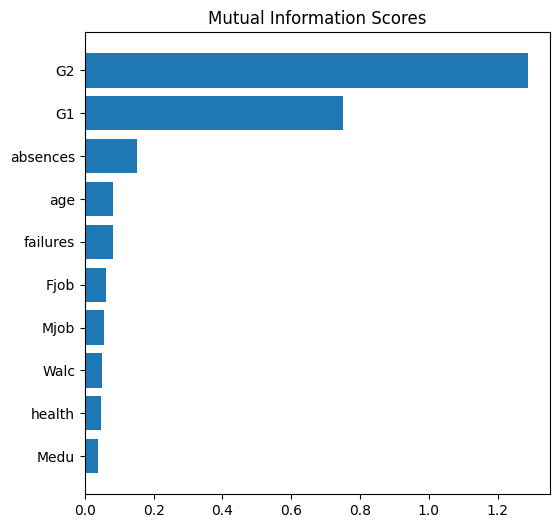

In [ ]:
#Plot top 10 by Mutual Information Score
plt.figure(dpi=100, figsize=(6, 6))
plot_mi_scores(mi_scores[:10])

#Choose top 10 by Mutual Information Score
mi_featureslist = list(mi_scores[:10].keys())
mi_featureslist
df_mi_10 = df[mi_featureslist]
df_mi_10.head()
import pickle
# For storing
# type(b) gives <class 'bytes'>;
# Save the model to a file using pickle
df_mi_10.to_csv('df_mi_10.csv', index=False)


In [ ]:
#### Select KBest for Feature Selection


# fit again a simple logistic regression
lr.fit(X_train_selected,y_train)
# select the same features on the test set, predict, and get the test accuracy:
X_test_selected = selector.transform(X_test)
y_pred = lr.predict(X_test_selected)
accuracy_score(y_test, y_pred)
# 0.52800000000000002

plt.figure(dpi=100, figsize=(6, 6))
plot_mi_scores(mi_scores[:10])

#Choose top 10 by Mutual Information Score
mi_featureslist = list(mi_scores[:10].keys())
mi_featureslist
df_mi_10 = df[mi_featureslist]
df_mi_10.head()
import pickle
# For storing
# type(b) gives <class 'bytes'>;
# Save the model to a file using pickle
df_mi_10.to_csv('df_mi_10.csv', index=False)



#### Mutual Information for Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


df=pd.read_csv("data.csv",sep=';')
X = df.copy()
y = X.pop("G3")

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

discrete_features = X.dtypes == int

# print(discrete_features)
# display(X.head())

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
# mi_scores[:10]
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

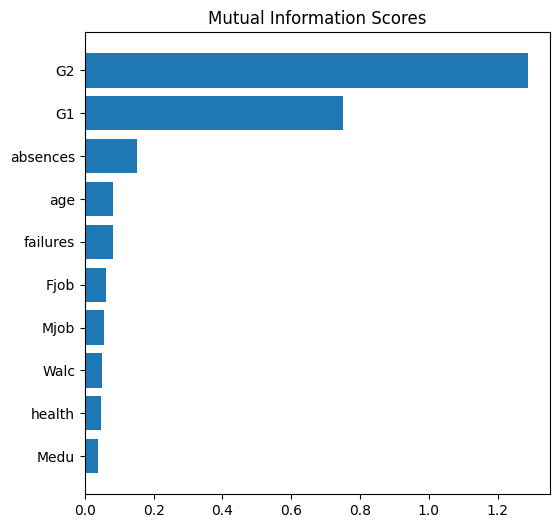

In [ ]:
#Plot top 10 by Mutual Information Score
plt.figure(dpi=100, figsize=(6, 6))
plot_mi_scores(mi_scores[:10])

#Choose top 10 by Mutual Information Score
mi_featureslist = list(mi_scores[:10].keys())
mi_featureslist
df_mi_10 = df[mi_featureslist]
df_mi_10.head()
import pickle
# For storing
# type(b) gives <class 'bytes'>;
# Save the model to a file using pickle
df_mi_10.to_csv('df_mi_10.csv', index=False)


In [ ]:
# #### Select KBest for Feature Selection


# # fit again a simple logistic regression
# lr.fit(X_train_selected,y_train)
# # select the same features on the test set, predict, and get the test accuracy:
# X_test_selected = selector.transform(X_test)
# y_pred = lr.predict(X_test_selected)
# accuracy_score(y_test, y_pred)
# # 0.52800000000000002

# plt.figure(dpi=100, figsize=(6, 6))
# plot_mi_scores(mi_scores[:10])

# #Choose top 10 by Mutual Information Score
# mi_featureslist = list(mi_scores[:10].keys())
# mi_featureslist
# df_mi_10 = df[mi_featureslist]
# df_mi_10.head()
# import pickle
# # For storing
# # type(b) gives <class 'bytes'>;
# # Save the model to a file using pickle
# df_mi_10.to_csv('df_mi_10.csv', index=False)



In [ ]:
# linreg10,KBf10,preds,X_train_selected = feature_chooser(KBest_fr,linreg1)



In [ ]:
# model_dict = {}

In [ ]:

# model_dict["LinReg_5_features"] = {'Model':linreg5,'Feature_Selector':KBfr5,'Predictions':preds}


In [ ]:
# model_dict
# print((model_dict["LinReg_5_features"]["Predictions"]))
# dfsamp = pd.DataFrame(model_dict.values(),index=model_dict.keys(),columns=model_dict.values())

[ 7.94428591 15.37302996  8.87284608 14.38964721 13.70082882 10.52989744
 12.85260234 16.45938772 -0.90926167  7.66539517  7.46501423  8.70489936
 12.86712498  8.04575369  7.66102167 12.46084011  8.04575369 19.08617898
 12.52570854 -1.77368413 10.77151984 18.96945783 12.12494666 10.50397109
 15.32534238 16.308098   12.58182997  7.02202522 13.61513946  7.21001908
 10.73303988  9.03725482 -1.59646805  8.50389128  5.36497386 13.84347632
 11.63150857  5.29636056 10.04432628 10.81519246  8.67407715  5.65614959
 16.03368285  9.3958521  10.72877117  9.37716554  8.36561727  9.08036202
  6.94627692  9.938485   11.59907435 18.33410417 15.45070574  6.85548213
 12.60859184  5.2554925  15.15463416 10.61205002  9.57317297  6.10616881
 13.6921866   7.69408303 13.89532904 13.79365438 11.4674115  11.38525892
  9.87512378 11.21658148 11.1653559   7.51483617 12.90169355  6.84491393
 -1.97682656  8.71515208  8.44339635  8.0932329   7.17534572  9.27913095
  6.29150326]


TypeError: unhashable type: 'dict'

In [ ]:
linreg5_selector.get_feature_names_out(X_train.columns)
preds
# y_test

array([ 8.58517196, 15.67615293,  8.7988778 , 14.79378164, 14.12210067,
       10.44969114, 12.82358573, 16.2559269 , -0.36090871,  7.29543119,
        7.53615484,  8.59643999, 12.6957474 ,  8.05075879,  7.63763065,
       12.31841124,  8.05075879, 18.76708928, 12.05264983, -1.11558102,
       11.27869269, 18.77614429, 11.91353562, 10.44969114, 15.09467975,
       16.06725882, 12.47128734,  7.5677459 , 13.95060076,  6.0922274 ,
       10.75964425,  9.49258101, -0.92691294,  8.42809494,  5.16094968,
       14.35561574, 11.67610831,  5.40232861,  9.58383273, 10.29615976,
        8.6460017 ,  5.15374109, 16.33236495,  9.28844399, 10.59771315,
        9.24949714,  8.35165689,  9.1446229 ,  6.96594968, 10.33916033,
       11.49870826, 18.08885502, 15.28334783,  6.85371965, 12.99834472,
        5.13105784, 15.08341172, 10.48548312,  9.47225798,  6.10560064,
       14.04566263,  7.60353788, 13.47834782, 13.63253449, 11.87119033,
       11.83539835, 10.33746111, 11.10104907, 11.13212633,  8.01

## Modeling <a class="anchor" id="Modeling"></a>

#### First run all regression models on numerical features only with no hyperparamater tuning to get basic performance

In [ ]:
# Model with only unprocessed numerical features, no categorical
mse = mean_squared_error
# rmse = mse**0.5
mae = mean_absolute_error
R_2 = r2_score
mape = mean_absolute_percentage_error

# Assuming X is your feature matrix with both numerical and categorical features
# Separate Target
X = df.drop("G3", axis=1)
nums = [col for col in X.columns if X[col].dtype == "int64"]
X = X[nums]
y = df["G3"]

# # # Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# Linear Regression
random_state=42
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
lrpreds = lr.predict(X_test)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svrpreds = svr.predict(X_test)

# Linear Support Vector Regression
lsvr = LinearSVR(random_state=42)
lsvr.fit(X_train, y_train)
lsvrpreds = lsvr.predict(X_test)

# Random Forest Regression
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfrpreds = rfr.predict(X_test)

# Gradient Boosted Regression
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)
gbrpreds = gbr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# # print(lr.coef_)
# # print(lrpreds)
# print('-'*75)
# print(lr.coef_)
# print("LINEAR REGRESSION RESULTS")
# print("Mean Squared Error: ", mse(y_test, lrpreds))
# print("Root Mean Squared Error: ", mse(y_test, lrpreds)**0.5)
# print("Mean Absolute Error: ", mae(y_test, lrpreds))
# print("R^2 Score: ", R_2(y_test, lrpreds))
# print("MAPE: ", mape(y_test, lrpreds))

# # print(svr.coef_)
# # print(svrpreds)
# print('-'*75)
# print("SVR RESULTS")
# print("Mean Squared Error: ", mse(y_test, svrpreds))
# print("Root Mean Squared Error: ", mse(y_test, svrpreds)**0.5)
# print("Mean Absolute Error: ", mae(y_test, svrpreds))
# print("R^2 Score: ", R_2(y_test, svrpreds))
# print("MAPE: ", mape(y_test, svrpreds))

# # print(lsvr.coef_)
# # print(lsvrpreds)
# print('-'*75)
# print("LINEAR SVR RESULTS")
# print("Mean Squared Error: ", mse(y_test, lsvrpreds))
# print("Root Mean Squared Error: ", mse(y_test, lsvrpreds)**0.5)
# print("Mean Absolute Error: ", mae(y_test, lsvrpreds))
# print("R^2 Score: ", R_2(y_test, lsvrpreds))
# print("MAPE: ", mape(y_test, lsvrpreds))

# # print(rtf.coef_)
# # print(rtf)
# print('-'*75)
# print("RANDOM FOREST RESULTS")
# print("Mean Squared Error: ", mse(y_test, rfrpreds))
# print("Root Mean Squared Error: ", mse(y_test, rfrpreds)**0.5)
# print("Mean Absolute Error: ", mae(y_test, rfrpreds))
# print("R^2 Score: ", R_2(y_test, rfrpreds))
# print("MAPE: ", mape(y_test, rfrpreds))

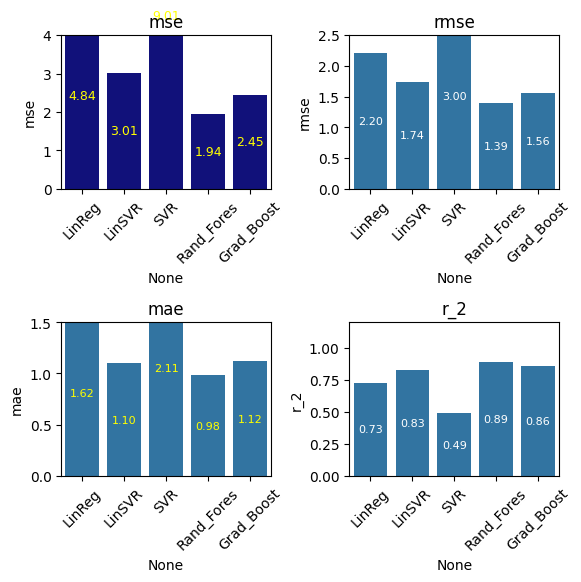

In [ ]:
# Visually compare model scores for each of four metrics
# Create list of models
model_list = [lr,lsvr,svr,rfr,gbr]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    ipreds = i.predict(X_test)
    mse = mean_squared_error(y_test, ipreds)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_test, ipreds)
    r_2 = r2_score(y_test,ipreds)
    scores.append([mse,rmse,mae,r_2])
# Make dataframe of scores by model
df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])

# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")

# Plot barplots on each subplot
sns.barplot(data=df_scores, x=df_scores.index, y="mse", ax=axs[0, 0], color='darkblue')
sns.barplot(data=df_scores, x=df_scores.index, y="rmse", ax=axs[0, 1])
sns.barplot(data=df_scores, x=df_scores.index, y="mae", ax=axs[1, 0])
sns.barplot(data=df_scores, x=df_scores.index, y="r_2", ax=axs[1, 1])
# bar_list = ['red','blue','orange','green']
# axs[0,0].bar(df_scores.index, df_scores["mse"],color='darkblue')

# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)

# Add values inside the bars
for p in axs[0, 0].patches:
    axs[0, 0].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                   ha='center', va='center', fontsize=9, color='yellow')
    axs[0,0].set_ylim(0, 4)

for p in axs[0, 1].patches:
    axs[0, 1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                   ha='center', va='center', fontsize=8, color='white')
    axs[0,1].set_ylim(0, 2.5)

for p in axs[1,0].patches:
    axs[1, 0].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                   ha='center', va='center', fontsize=8, color='yellow')
    axs[1,0].set_ylim(0, 1.5)

for p in axs[1, 1].patches:
    axs[1, 1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                   ha='center', va='center', fontsize=8, color='white')
    axs[1,1].set_ylim(0, 1.2)

    
# Repeat similar code for other subplots

fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Model with only unprocessed numerical features, no categorical
mse = mean_squared_error
# rmse = mse**0.5
mae = mean_absolute_error
R_2 = r2_score
mape = mean_absolute_percentage_error

# Assuming X is your feature matrix with both numerical and categorical features
# Separate Target

# Linear Regression
random_state=42
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)
lrpreds = lr.predict(X_test)

# Support Vector Regression
svr = SVR()
svr.fit(X_train, y_train)
svrpreds = svr.predict(X_test)

# Linear Support Vector Regression
lsvr = LinearSVR(random_state=42)
lsvr.fit(X_train, y_train)
lsvrpreds = lsvr.predict(X_test)

# Random Forest Regression
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train, y_train)
rfrpreds = rfr.predict(X_test)

# Gradient Boosted Regression
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train,y_train)
gbrpreds = gbr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# Visually compare model scores for each of four metrics
# Create list of models
model_list = [lr,lsvr,svr,rfr,gbr]
# Initalize list of models scores
scores = []
# Store model scores in list of lists
for i in model_list:
    ipreds = i.predict(X_train)
    mse = mean_squared_error(y_train, ipreds)
    rmse = (mse**0.5)
    mae = mean_absolute_error(y_train, ipreds)
    r_2 = r2_score(y_train,ipreds)
    scores.append([mse,rmse,mae,r_2])
# Make dataframe of scores by model
df_scores = pd.DataFrame(scores, index=["LinReg","LinSVR","SVR","Rand_Fores","Grad_Boost"], columns=["mse","rmse","mae","r_2"])

# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Set titles for each subplot
axs[0, 0].set_title("mse")
axs[0, 1].set_title("rmse")
axs[1, 0].set_title("mae")
axs[1, 1].set_title("r_2")

# Plot barplots on each subplot
sns.barplot(data=df_scores, x=df_scores.index, y="mse", ax=axs[0, 0], color='darkblue')
sns.barplot(data=df_scores, x=df_scores.index, y="rmse", ax=axs[0, 1])
sns.barplot(data=df_scores, x=df_scores.index, y="mae", ax=axs[1, 0])
sns.barplot(data=df_scores, x=df_scores.index, y="r_2", ax=axs[1, 1])
# bar_list = ['red','blue','orange','green']
# axs[0,0].bar(df_scores.index, df_scores["mse"],color='darkblue')

# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)

# # Add values inside the bars
# for p in axs[0, 0].patches:
#     axs[0, 0].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
#                    ha='center', va='center', fontsize=9, color='yellow')
#     # axs[0,0].set_ylim(0, 4)

# for p in axs[0, 1].patches:
#     axs[0, 1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
#                    ha='center', va='center', fontsize=8, color='white')
#     # axs[0,1].set_ylim(0, 2.5)

# for p in axs[1,0].patches:
#     axs[1, 0].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
#                    ha='center', va='center', fontsize=8, color='yellow')
#     # axs[1,0].set_ylim(0, 1.5)

# for p in axs[1, 1].patches:
#     axs[1, 1].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
#                    ha='center', va='center', fontsize=8, color='white')
#     # axs[1,1].set_ylim(0, p.get)

    
# Repeat similar code for other subplots

fig.tight_layout()

# Show the plot
plt.show()

NameError: name 'lr' is not defined

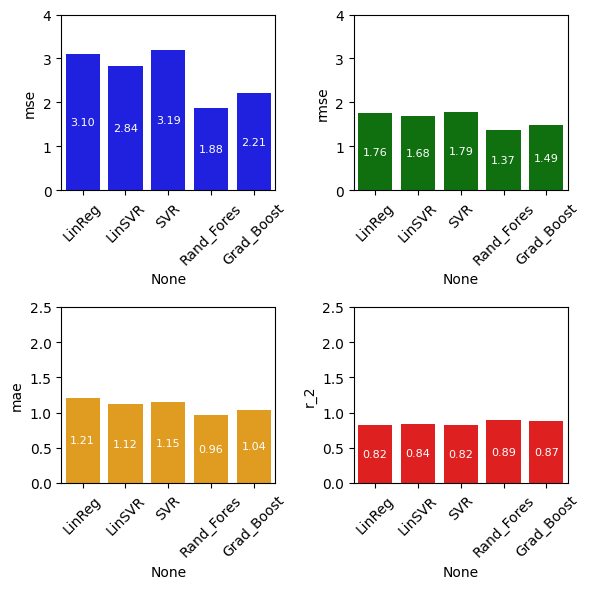

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_scores is a DataFrame with appropriate columns

# View
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Set titles for each subplot
titles = ["mse", "rmse", "mae", "r_2"]

# Define colors for each subplot
colors = ['blue', 'green', 'orange', 'red']

for i in range(2):
    for j in range(2):
        # Plot barplot
        sns.barplot(data=df_scores, x=df_scores.index, y=titles[i * 2 + j], ax=axs[i, j], color=colors[i * 2 + j])

        # Rotate x-axis labels
        axs[i, j].tick_params(axis='x', labelrotation=45)

        # Add values inside the bars
        for p in axs[i, j].patches:
            axs[i, j].text(p.get_x() + p.get_width() / 2., p.get_height() / 2., f'{p.get_height():.2f}',
                           ha='center', va='center', fontsize=8, color='white')

        # Set y-axis limits
        axs[i, j].set_ylim(0, 4 if i == 0 else (2.5 if i == 1 else 1.5))

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

#### Random forest performed best upon initial examination for the metrics chosen

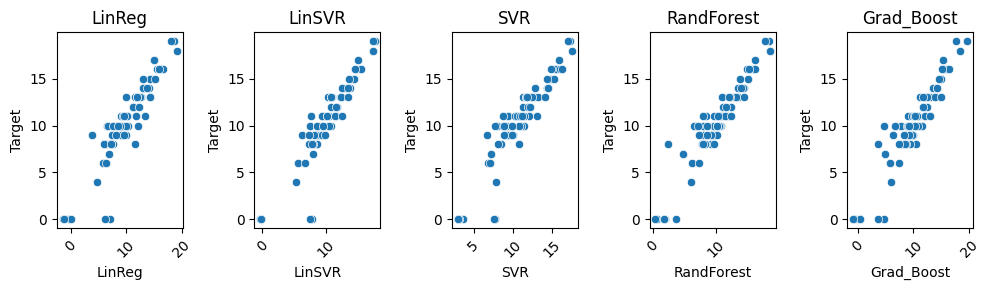

In [ ]:
# Visualize scatter of each model's target vs. predictions
# create dataframe with all model predictions and target
new_dict = {'LinReg': lrpreds, 'LinSVR': lsvrpreds, 'SVR': svrpreds,'RandForest':rfrpreds,"Grad_Boost":gbrpreds, "Target":y_test}
df_pred_true = pd.DataFrame(new_dict, columns=new_dict.keys())
df_pred_true
# Build Scatterplots
fig, axs = plt.subplots(1, 5, figsize=(10,3))

# Set titles for each subplot
axs[0].set_title("LinReg")
axs[1].set_title("LinSVR")
axs[2].set_title("SVR")
axs[3].set_title("RandForest")
axs[4].set_title("Grad_Boost")

# Plot scatterplots on each subplot
sns.scatterplot(data=df_pred_true, x="LinReg", y="Target", ax=axs[0])
sns.scatterplot(data=df_pred_true, x="LinSVR", y="Target", ax=axs[1])
sns.scatterplot(data=df_pred_true, x="SVR", y="Target", ax=axs[2])
sns.scatterplot(data=df_pred_true, x="RandForest", y="Target", ax=axs[3])
sns.scatterplot(data=df_pred_true, x="Grad_Boost", y="Target", ax=axs[4])


# Rotate x-axis labels
axs.flat[0].tick_params(axis='x', labelrotation=45)
axs.flat[1].tick_params(axis='x', labelrotation=45)
axs.flat[2].tick_params(axis='x', labelrotation=45)
axs.flat[3].tick_params(axis='x', labelrotation=45)
axs.flat[4].tick_params(axis='x', labelrotation=45)


fig.tight_layout()

# Show the plot
plt.show()

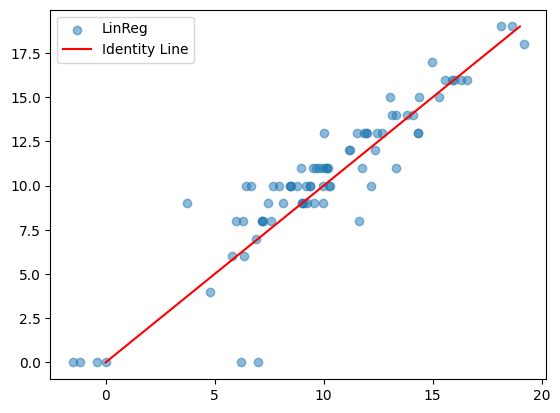

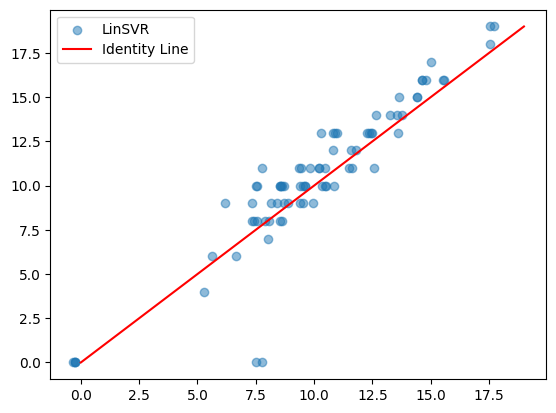

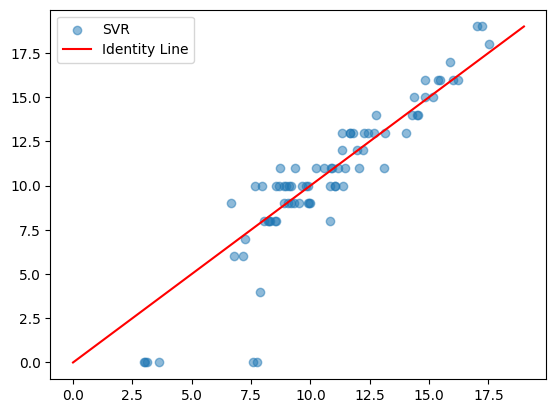

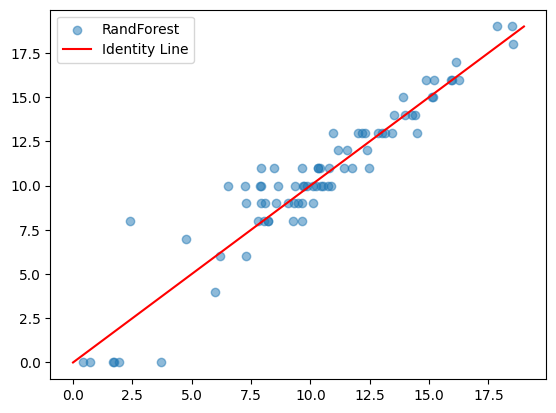

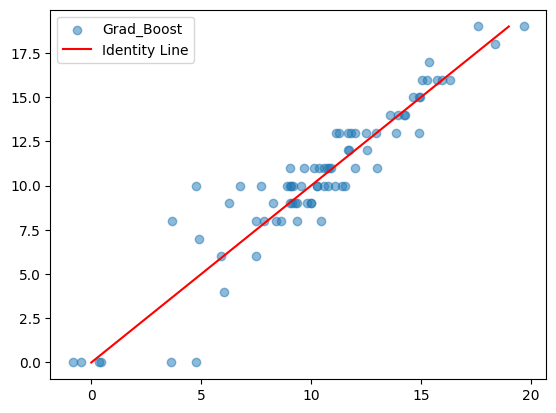

In [ ]:
# Now again in more detail
for i in df_pred_true.columns[:-1]:
    plt.scatter(df_pred_true[i],y_test, alpha=0.5, label=f'{i}')
    # plt.scatter(y_test, gbrpreds, alpha=0.5, label='Gradient Boosting Regression')
    plt.plot(np.arange(20), np.arange(20), c='r', label='Identity Line')
    # Show legend
    plt.legend()
    plt.show()

In [ ]:
# print(linpreds)
# print(type(y_test))

y_s = pd.DataFrame(y_test).reset_index(drop=True)
preds = pd.DataFrame(lrpreds).reset_index(drop=True)
y_s
preds
results = pd.concat([y_s, preds], axis=1)
results["Residuals"] = results[0] - results['G3']
results['AbsResids_frac'] = results['Residuals'].abs()/results['G3']
results['AbsResids_frac'].sum()



inf

In [ ]:
# # function to manually calculate VIF to find multi-collinearity
# def calculate_vif(C):
#     vif_values = []
#     num_vars = C.shape[1]
    

#     for i in range(num_vars):
#         # ECtracting the ith column as the dependent variable
#         d = C[:, i]
#         # ECtracting all other columns as independent variables
#         C_i = np.delete(C, i, axis=1)
#         # Fitting the regression model
#         beta = np.linalg.lstsq(C_i, d, rcond=None)[0]
#         print(beta)
#         # Calculating R-squared value
#         r_squared = 1 - np.var(d - np.dot(C_i, beta)) / np.var(d)

#         # Calculating VIF
#         vif = 1 / (1 - r_squared)

#         vif_values.append(vif)

#     return vif_values


# # ECample usage:
# # C is your matriC of predictor variables, where each column represents a variable
# # C = ...
# # print(A)
# vif_values = calculate_vif(A)
# print("VIF values:", vif_values)